In [17]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [18]:
#eager모드로 실행되고있는지 확인
tf.executing_eagerly()
#현재 eager모드가 default모드이다.

True

In [19]:
x=[[2.]]
m = tf.matmul(x,x) #결과가 tensor로 나온다.(EagerTensor) - 일반적인python core함수이다.
print('결과 = {}'.format(m)) #run없이 출력가능(즉시실행모드)
print(type(m))

결과 = [[4.]]
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [20]:
import numpy as np
print(x[0][0])
print(np.math.sin(x[0][0]))

2.0
0.9092974268256817


In [21]:
print(m[0][0]) 
print(np.math.sin(m[0][0])) #tensor가 numpy 일반함수의 매개변수로 입력가능, numpy와 호환이 된다.

tf.Tensor(4.0, shape=(), dtype=float32)
-0.7568024953079282


In [22]:
#pandas는 numpy로 만듬
#일반 프로그램 하듯이 매개변수로 전달이 가능해 진다.

In [23]:
a = tf.constant([[1,2],[3,4]])
print(a) #shape와 dtype, 값이 모두 출력된다.

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [24]:
b = tf.add(a,1)
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [25]:
c = np.multiply(a,b)
print(c) #일반함수로도 출력가능

[[ 2  6]
 [12 20]]


In [26]:
print(a.numpy()) #값만 보고싶을때

[[1 2]
 [3 4]]


In [27]:
def check_double(max_num):
    counter = tf.constant(0) #tensor
    max_num = tf.convert_to_tensor(max_num) #tensor로 변환할때는 convert_to_tensor 사용
    for num in range(1, max_num.numpy()+1):
        #일반식에서 사용될때는 numpy를 이용해서 변환해주어야한다.
        num = tf.constant(num) #상수로 변환
        if int(num%3)==0 and int(num%5)==0:
            print('3이나 5의 배수')
        elif int(num%3)==0:
            print('3의 배수')
        elif int(num%5)==0:
            print('5의 배수')
        else : 
            print(num.numpy())
        counter+=1
        #혼합해서 사용하는것이 가능하다.

In [28]:
check_double(10)

1
2
3의 배수
4
5의 배수
3의 배수
7
8
3의 배수
5의 배수


In [29]:
w = tf.Variable([[1.0]]) #값을 초기화
with tf.GradientTape() as tape:
    #tape를 인스턴스 시켰다.(instance)
    loss = w*w # w^2
grad = tape.gradient(loss,w) #w값에 대해서 loss를 미분해라. (딥러닝 - 편미분)
print(grad)
#미분해서 2w로 w가 1이니까 2가 나온다.

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


In [30]:
x = tf.ones((2,2)) # [[1,1],[1,1]]
with tf.GradientTape() as t:
    t.watch(x) # x값을 저장해라.
    y = tf.reduce_sum(x) #1+1+!+1 = 4
    z = tf.multiply(y,y) #16 = y^2 -> 미분하면 2y
dz_dx = t.gradient(z,x) #2y
print(dz_dx)
for i in [0,1]:
    for j in [0,1]:
        assert dz_dx[i][j].numpy() == 8.0

tf.Tensor(
[[8. 8.]
 [8. 8.]], shape=(2, 2), dtype=float32)


In [31]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as t:
    #tape에는 미분 과정이 저장된다.(호출하고나면 지워진다.)
    t.watch(x)
    y = x*x #2x -> 6
    z = y*y #4x^3 ->108(27*4)
dz_dx = t.gradient(z,x) #한번 gradient를 호출하면 저장된 것이 지워진다.
print(dz_dx)
dy_dx = t.gradient(y,x) #persistent = True -> 지워지지 않고 남아 정상적으로 출력된다.
print(dy_dx)

tf.Tensor(108.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


In [32]:
hello = tf.constant('Hello world')
print(hello)

tf.Tensor(b'Hello world', shape=(), dtype=string)


In [33]:
print(hello.numpy())

b'Hello world'


In [34]:
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [35]:
rng = np.random
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [36]:
w = tf.Variable(rng.randn(), name='weight')
b = tf.Variable(rng.randn(), name='bias')

#행렬연산이 다 함수에 들어가 있다.
def linear_regression(x):
    #model
    return w*x+b
def mean_square(y_pred, y_true):
    #cost function
    return tf.reduce_mean(tf.square(y_pred-y_true))

optimizer = tf.optimizers.SGD(learning_rate)

In [37]:
def run_optimization():
    #미분을 통해서 역전파하는 함수
    with tf.GradientTape() as g:
        pred = linear_regression(X) #예측값은 모델에서 나온다. (모델함수가 계산한 결과 = 예측값)
        loss = mean_square(pred, Y)
    gradients = g.gradient(loss, [w,b]) #수정되는 편미분(w,b를 중심하는 편미분을 하게된다.)
    #두개의 변수 x, b를 각각 편미분(하나를 계산할때 하나를 상수로 본다.)
    optimizer.apply_gradients(zip(gradients, [w,b]))
    #apply_gradients 를 호출하게 된다. - gradient로 나온값을 더하고 빼서 얘를 학습해 나간다.
    #역전파 과정을 수식으로 직접지정

In [38]:
for step in range(1, training_steps+1):
    run_optimization()
    if step % display_step ==0:
        #1000번을 돌아가면서 위의 함수를 반복호출
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print('step : %i, loss : %f, w : %f, b : %f'%(step, loss, w.numpy(), b.numpy()))

step : 50, loss : 0.661686, w : 0.537317, b : -1.226557
step : 100, loss : 0.552109, w : 0.504625, b : -0.994784
step : 150, loss : 0.466176, w : 0.475674, b : -0.789533
step : 200, loss : 0.398785, w : 0.450036, b : -0.607771
step : 250, loss : 0.345935, w : 0.427331, b : -0.446808
step : 300, loss : 0.304490, w : 0.407225, b : -0.304266
step : 350, loss : 0.271987, w : 0.389420, b : -0.178035
step : 400, loss : 0.246497, w : 0.373653, b : -0.066250
step : 450, loss : 0.226508, w : 0.359690, b : 0.032743
step : 500, loss : 0.210832, w : 0.347324, b : 0.120407
step : 550, loss : 0.198538, w : 0.336374, b : 0.198040
step : 600, loss : 0.188897, w : 0.326677, b : 0.266789
step : 650, loss : 0.181336, w : 0.318089, b : 0.327670
step : 700, loss : 0.175407, w : 0.310484, b : 0.381585
step : 750, loss : 0.170757, w : 0.303750, b : 0.429329
step : 800, loss : 0.167111, w : 0.297786, b : 0.471610
step : 850, loss : 0.164251, w : 0.292505, b : 0.509053
step : 900, loss : 0.162008, w : 0.287828

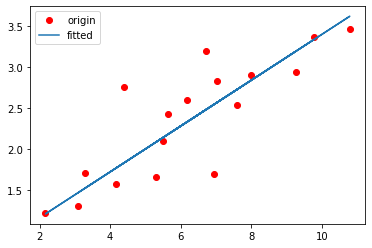

In [39]:
import matplotlib.pyplot as plt
plt.plot(X,Y, 'ro', label='origin') #실데이터의 산포도
plt.plot(X, np.array(w*X+b), label='fitted') #예측값 출력
plt.legend()
plt.show()

In [40]:
#만들어야하는 함수 3가지
    #모델
    #cost function
    #optimization - 미분으로 진행

In [41]:
#eager mode - 즉시실행몯, numpy와 호환된다.
    #gradient tape를 이용해서 미분을 진행한다.
    #함수베이스로 프로그램 구현 - 데이터는 placeholder가 없다. -> 함수의 매개변수로 데이터를 전달한다.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45432 missing from c

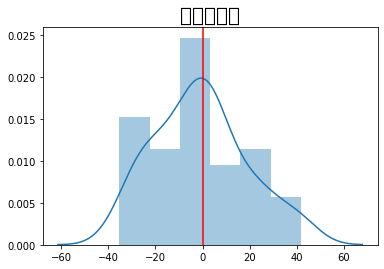

In [42]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

x_data = list(range(-20,21))
np.random.seed(2020)
mu = 0
sigma = 20
n = len(x_data)
noises = np.random.normal(mu, sigma, n)
plt.title('노이즈분포', size=20)
sns.distplot(noises)
plt.axvline(0, color='r') #axvline = vertical line
plt.show()

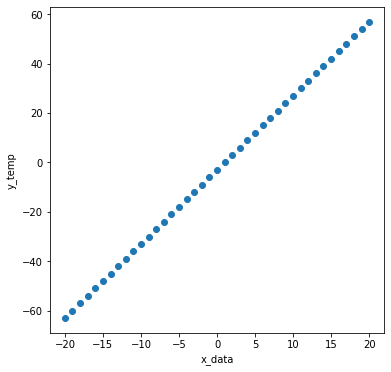

In [43]:
W_answer = 3
b_answer = -3
y_temp = list(np.array(x_data)*W_answer+b_answer)
plt.figure(figsize=(6,6))
plt.scatter(x_data, y_temp)
plt.xlabel('x_data')
plt.ylabel('y_temp')
plt.show()

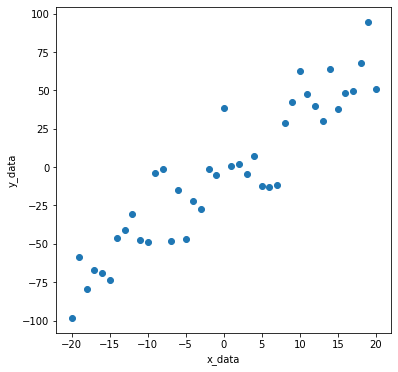

In [48]:
y_data = list(np.array(y_temp)+np.array(noises)) #정규분포로 만들어진 값을 더해 노이즈를 주었다.
plt.figure(figsize=(6,6))
plt.scatter(x_data, y_data)
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.show()

In [49]:
import tensorflow as tf
W = tf.Variable(-0.5)
b = tf.Variable(-0.5)
learning_rate = 0.001

0 	 W: 0.65633726, b: -0.50679857 	 Cost : 2717.1902


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44284 missing from c

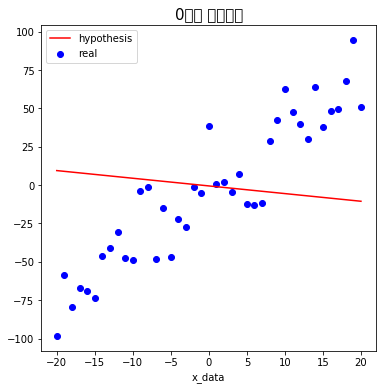



200 	 W: 3.6297755, b: -1.6261451 	 Cost : 323.11627


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44284 missing from c

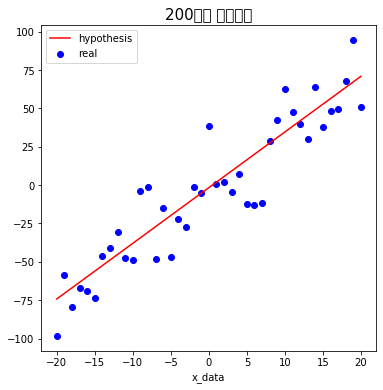



400 	 W: 3.6297755, b: -2.376165 	 Cost : 320.25763


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44284 missing from c

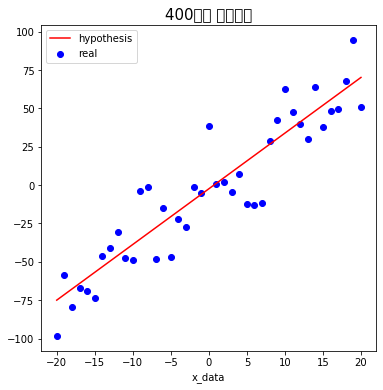



600 	 W: 3.6297755, b: -2.8787198 	 Cost : 318.97412


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44284 missing from c

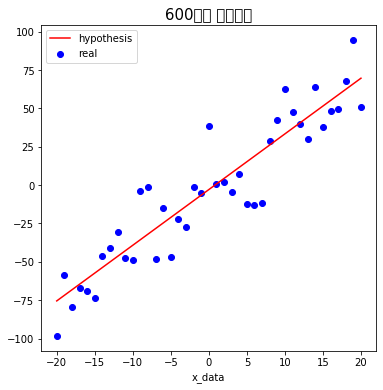



800 	 W: 3.6297755, b: -3.2154572 	 Cost : 318.39795


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44284 missing from c

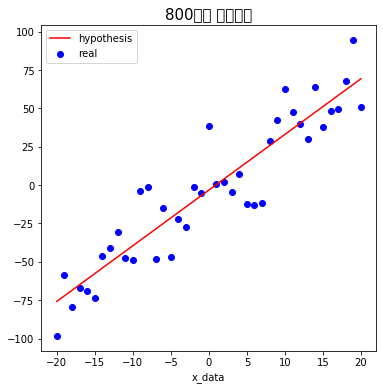



1000 	 W: 3.6297755, b: -3.4410856 	 Cost : 318.13922


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44284 missing from c

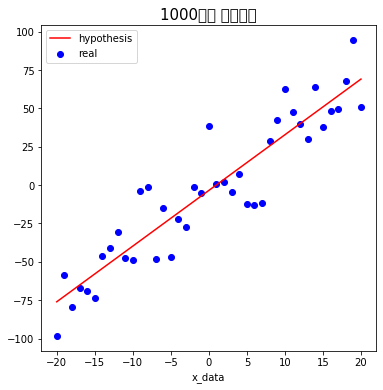

In [50]:
cost_list=[]
for i in range(1000+1):
    with tf.GradientTape() as tape:
        #GradientTape 값을 저장하고 있다. 이전값을 가지고 있다. 
        hypothesis = W*x_data+b
        cost = tf.reduce_mean(tf.square(hypothesis-y_data))
        W_grad, b_grad = tape.gradient(cost,[W,b])
        #미분을 하는이유 : 방향값을 결정(optimizer이 기존에 하던역할)
        #optimizer 는 learning_rate의 값을 조절하고 momentum 을 이용해서 가던 방향을 고려하여 최적화를 했었다.
        W.assign_sub(learning_rate*W_grad) #러닝레이터 : 학습율, assign_sub : -=와 값은 역할을 한다.
        b.assign_sub(learning_rate*b_grad)
        cost_list.append(cost.numpy())
        if i%200 == 0:
            #1000번 돌아가는데 200번 마다 찍혀서 5번의 이미지가 출력된다.
            print('%s \t W: %s, b: %s \t Cost : %s'%(i, W.numpy(), b.numpy(), cost.numpy()))
            plt.figure(figsize=(6,6))
            plt.title('%s번째 모델결과'%i, size=15)
            plt.scatter(x_data, y_data, color='blue', label='real')
            plt.plot(x_data, hypothesis, color='red', label='hypothesis')
            plt.xlabel('x_data')
            plt.legend(loc='upper left')
            plt.show()
            print('\n')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54943 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49845 missing from cur

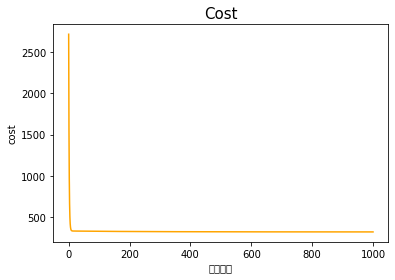

In [51]:
plt.title('Cost', size=15)
plt.plot(cost_list, color='orange')
plt.xlabel('학습횟수')
plt.ylabel('cost')
plt.show()

In [54]:
import os
import pandas as pd
dataset = tf.data.Dataset.from_tensor_slices([8,3,0,8,2,1])

In [55]:
for elem in dataset:
    print(elem.numpy())

8
3
0
8
2
1


In [57]:
it = iter(dataset)
print(next(it).numpy())
print(next(it).numpy())

8
3


In [59]:
def count(stop):
    #generator - yield에 의해서 비동기 연산을 한다. 무한루프 연산(조건이 거짓이 될때까지 계속 돈다.)
    #generator는 for문과 함께 돈다. 호출할시에만 돈다.
    #while문이 for문의 요청이 있을때 활동하게 되어진다.
    i = 0
    while i<stop:
        yield i
        i+=1
for n in count(5):
    print(n)

0
1
2
3
4


In [65]:
ds_counter = tf.data.Dataset.from_generator(count, args=[25], output_types=tf.int32, output_shapes=()) #args=[25] - stop이 25가 된다.
for count_batch in ds_counter.repeat().batch(10).take(10):
    #끝날때 까지 반복해라, 행을 10개, 요소 10개로 만들어라.
    #take(10) - 한묶음에 10개를 발생시켜라
    print(count_batch.numpy())
#batch로 data를 feeding하기가 쉬워진다.

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]
[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]


In [ ]:
#mini_batch = tf.data.Dataset 데이터 파이프라인을 형성해서 데이터를 쉼없이 공급한다. 안정적인 학습이 이루어 진다.
    #repeat(), take(), batch(), skip(데이터 뛰어넘기), shuffle(),
    #map(), filter() - 이 두개는 pandas의 사상을 이어받아 데이터를 변환할 수 있다.

In [67]:
f = lambda x:2*x
for elem in ds_counter.map(f):
    #전처리 기능도 구현하고 있다.
    print(elem.numpy())

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48


In [68]:
f = lambda x:x%2==0
for elem in ds_counter.filter(f):
    #짝수인 데이터만 가지고 있다.
    print(elem.numpy())

0
2
4
6
8
10
12
14
16
18
20
22
24


In [90]:
num_classes = 10 #다중분류기의 activation - softmax(0~1사이의 확률값으로 매핑)
num_features = 784
learning_rate = 0.01
training_rate = 1000 #epochs와 같다.
batch_size = 256
display_step = 50

In [91]:
from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
x_train, x_test = x_train/255., x_test/255. #255로 나누게 되면 이미지 정규화가 된다. -> 부동소수점으로 표기된다.(0~1사이의 값으로 매핑)

In [92]:
#프로젝트 데이터 관리하는 방법
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1) #무작위로 반복하게 된다.
#prefetch - 미리 갖고오는 버퍼를 만들어라. (버퍼 - 중간저장공간)
#cpu, 하드디스크는 속도가 다르다.

In [106]:
#784*10
W = tf.Variable(tf.ones([num_features, num_classes]), name='weigth')
b = tf.Variable(tf.zeros([num_classes]), name='bias') #10개
def logistic_regression(x):
    #확률값으로 출력
    return tf.nn.softmax(tf.matmul(x,W)+b)
def cross_entropy(y_pred, y_true):
    #숫자로 로딩된 입력값을
    y_true = tf.one_hot(y_true, depth=num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.) #log는 0이면 무한대이다. (무한대로가는것을 막아주기위해 최소값과 최대값을 설정하였다.)
    return tf.reduce_mean(-tf.reduce_sum(y_true*tf.math.log(y_pred),1)) #복잡도
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.cast(y_true, tf.int64)) #숫자로 캐스팅 된 값 두개를 비교한다.
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
optimizer = tf.optimizers.SGD(learning_rate) #optimizer가 하는일은 기울기를 고려하여 가중치를 학습하는것

In [107]:
def run_optimization(x,y):
    with tf.GradientTape() as g:
        #이전값을 저장
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y) #불순도
        gradients = g.gradient(loss, [W,b]) #편미분 -> 기울기가 나온다. (방향값을 가짐)
        optimizer.apply_gradients(zip(gradients,[W,b]))

In [108]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps),1):
    #batch_size로 값을 가지고 온다.
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print('step : %i, loss : %f, accuracy : %f'%(step, loss, acc))

step : 50, loss : 1.875944, accuracy : 0.667969
step : 100, loss : 1.503870, accuracy : 0.781250
step : 150, loss : 1.431517, accuracy : 0.734375
step : 200, loss : 1.170570, accuracy : 0.835938
step : 250, loss : 1.087855, accuracy : 0.812500
step : 300, loss : 1.000308, accuracy : 0.808594
step : 350, loss : 0.950865, accuracy : 0.792969
step : 400, loss : 0.913115, accuracy : 0.824219
step : 450, loss : 0.830683, accuracy : 0.859375
step : 500, loss : 0.806462, accuracy : 0.851562
step : 550, loss : 0.714400, accuracy : 0.859375
step : 600, loss : 0.724087, accuracy : 0.855469
step : 650, loss : 0.764274, accuracy : 0.796875
step : 700, loss : 0.589089, accuracy : 0.917969
step : 750, loss : 0.717633, accuracy : 0.851562
step : 800, loss : 0.792546, accuracy : 0.796875
step : 850, loss : 0.720644, accuracy : 0.824219
step : 900, loss : 0.628489, accuracy : 0.867188
step : 950, loss : 0.628320, accuracy : 0.859375
step : 1000, loss : 0.632261, accuracy : 0.835938


In [118]:
#문제 : test데이터의 정확도를 출력하시오
pred = logistic_regression(x_test)
accuracy(pred, y_test).numpy() #정확도 출력

0.8879

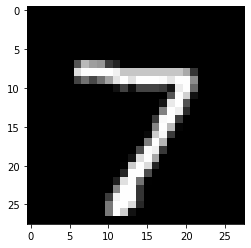

모델예측결과 : 7


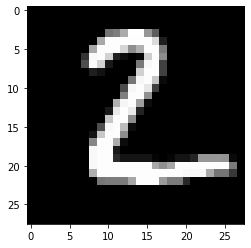

모델예측결과 : 2


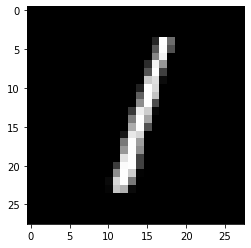

모델예측결과 : 1


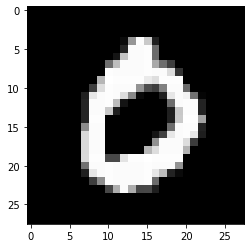

모델예측결과 : 0


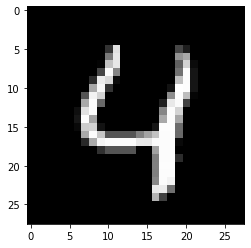

모델예측결과 : 4


In [123]:
# test데이터의 앞의 5장의 취해서 이미지를 출력하고 예측번호를 출력하시오
n_image = 5
test_image = x_test[:n_image]
pred = logistic_regression(test_image)

for i in range(n_image):
    plt.imshow(np.reshape(test_image[i], [28,28]), cmap='gray')
    plt.show()
    print('모델예측결과 : %i'%(tf.argmax(pred[i]).numpy()))

In [124]:
#keras 모델 구성 방법
    #sequential
    #funtional
    #model(class상속)

In [162]:
num_classes = 10 
num_features = 784
learning_rate = 0.1
training_steps = 2000 
batch_size = 256
display_step = 100

In [163]:
n_hidden_1 = 128 #레이어 2개 추가
n_hidden_2 = 256

In [164]:
from tensorflow.keras import Model, layers

In [165]:
class NeuralNet(Model):
    def __init__(self):
        #망을 구성하는 함수
        super(NeuralNet, self).__init__()
        #출력차수 - n_hidden_1, 입력차수 - 자동
        #입력데이터(256*784)->256*128
        self.fc1 = layers.Dense(n_hidden_1, activation=tf.nn.relu) #activation이나 망들은 nn에 들어있다.
        self.fc2 = layers.Dense(n_hidden_2, activation=tf.nn.relu) #256*256
        self.out = layers.Dense(num_classes) #256*10
    def call(self, x, is_training=False):
        #call함수의 용도 - class를 함수처럼 호출할 수 있게 한다.
        #들어오는놈이 입력차수를 결정한다.
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        if not is_training:
            #훈련 여부를 판단하기 위해서 -> accuracy를 잴때는 false로 한다.
            x = tf.nn.softmax(x)
        return x
neural_net = NeuralNet() #인스턴스 시켜 놓았다. 인스턴스 할때는 괄호를 쳐주었다.

In [166]:
#keras의 특징 - 가중치를 직접다루지 않는다. 자동화 (dense망 - 완전연결망, 행렬곱을 해주고 가중치 저장공간을 만든다.)

In [167]:
def cross_entropy(x,y):
    y = tf.cast(y, tf.int64)
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    return tf.reduce_mean(loss)
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred,1),tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)
optimizer = tf.optimizers.SGD(learning_rate)

In [172]:
def run_optimization(x,y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True) #call을 오버라이딩 해놓았기 떄문에 함수처럼 사용이 가능하다.
        #모델을 상속받으면 가중치가 자동화되니까 가중치, 바이어스를 알수가없다.(학습하는것은 가중치, 바이어스)
        loss = cross_entropy(pred, y)
        trainable_variables = neural_net.trainable_variables #가중치이름, 바이어스 이름을 모른다.
        gradient = g.gradient(loss, trainable_variables) #W, b와 마찬가지이다.
        optimizer.apply_gradients(zip(gradient, trainable_variables))

In [173]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps),1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print('step : %i, loss : %f, accuracy : %f'%(step, loss, acc))

step : 100, loss : 0.456135, accuracy : 0.863281
step : 200, loss : 0.304047, accuracy : 0.910156
step : 300, loss : 0.270996, accuracy : 0.945312
step : 400, loss : 0.198266, accuracy : 0.957031
step : 500, loss : 0.233085, accuracy : 0.929688
step : 600, loss : 0.122555, accuracy : 0.972656
step : 700, loss : 0.130528, accuracy : 0.964844
step : 800, loss : 0.160231, accuracy : 0.960938
step : 900, loss : 0.166406, accuracy : 0.945312
step : 1000, loss : 0.131573, accuracy : 0.960938
step : 1100, loss : 0.136144, accuracy : 0.964844
step : 1200, loss : 0.116579, accuracy : 0.980469
step : 1300, loss : 0.106850, accuracy : 0.960938
step : 1400, loss : 0.076026, accuracy : 0.976562
step : 1500, loss : 0.095793, accuracy : 0.972656
step : 1600, loss : 0.118481, accuracy : 0.976562
step : 1700, loss : 0.101064, accuracy : 0.968750
step : 1800, loss : 0.110013, accuracy : 0.972656
step : 1900, loss : 0.082571, accuracy : 0.968750
step : 2000, loss : 0.067203, accuracy : 0.996094


In [ ]:
#test accuracy 를 출력
pred = neural_net(x_test, is_training=False)
print('Test Accuracy : %f'%(accuracy(pred, y_test)))
#5개의 이미지를 출력하고 예측번호를 출력하시오.